In [3]:
library(rdydisstools)
library(ggplot2)
library(svglite)
setwd('~/notebooks/dissertation')
loadpackages(c('doParallel', 'foreach', 'logging', 'glue', 'grid', 'gridExtra', 'dplyr', 'ggplot2'))
df <- load('artifacts/rq1/maxJ.RData')
thisdir <- '~/notebooks/dissertation/artifacts/figures/'

Figure 1.1 Histogram of the standard deviation index for maximum informedness of longstring for simulated samples

In [4]:
mu = round(mean(maxJ$ls), 1)
fig1.1 <- maxJ %>% ggplot(aes(x=ls)) + geom_histogram() + geom_vline(xintercept = mu, linetype="dashed", 
                color = "red", size=.5) + ylab('Count of Samples') + xlab('Standard Deviations') + 
                annotate("text", x = mu + .5, y=900, label = paste("Mean =", mu), color='red')

ggsave(paste0(thisdir, 'images/fig1.1.svg'), fig1.1, device='svg')

Saving 6.67 x 6.67 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


## Look at stability of the SD at which J is max across samples

[1] 0.1672

[1] 0.9538

[1] 0.7866

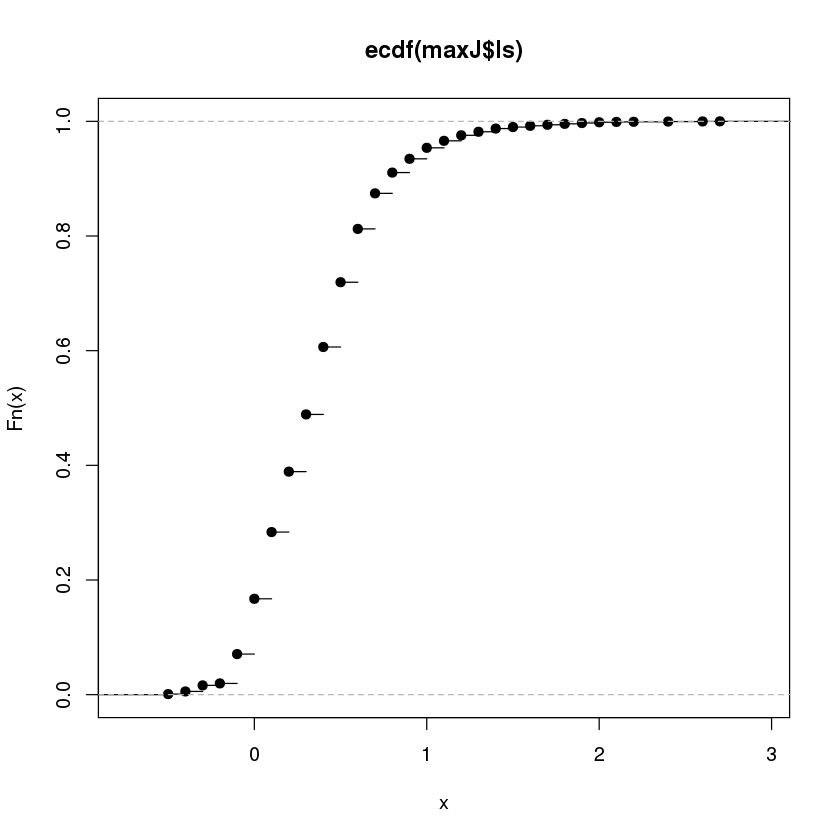

In [27]:
plot(ecdf(maxJ$ls))
f <- ecdf(maxJ$ls)
f(0)
f(1)
f(1)- f(0)

In [5]:
# Range here is misleading. It's actually the point along the range that 
# the maximum informedness was located. Basically the maxLookup uses a
# data frame with columns range, informedness, with range taking on all
# of the values of the range -3:3 by .1 increments. Then it finds the
# maximum value of informedness and takes that row (i.e. the informedness
# and it's associated location along the range). The code makes this 
# difficult to follow if you don't know this.


,ls.range,ls.informedness,ls.meanJ,ls.sdJ,eo.range,eo.informedness,eo.meanJ,eo.sdJ,md.range,md.informedness,md.meanJ,md.sdJ
31,0.0,0.3591659,0.14512739,0.13173527,-0.3,0.13494576,0.008290483,0.02819063,1.4,0.1449073,0.02921494,0.07223822
36,0.5,0.2142857,0.10869886,0.10508109,0.6,0.10601673,0.037241281,0.04143076,0.4,0.2226512,0.05523293,0.09172386
39,0.8,0.2400000,0.12024159,0.11493342,-0.1,0.12842105,0.011458154,0.03810376,0.3,0.3410526,0.12075928,0.09210940
32,0.1,0.1851038,0.08996978,0.08976647,0.3,0.10280830,0.027050181,0.02984244,0.5,0.2319902,0.03557317,0.08736082
42,1.1,0.1142857,0.04556924,0.06500177,0.5,0.18156682,0.055359976,0.05429461,0.9,0.4165899,0.14924832,0.14349445
311,0.0,0.2258242,0.10094654,0.09740270,-0.5,0.08805031,0.013636637,0.02589012,0.0,0.1371829,0.03662731,0.05849961


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'ls.range' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

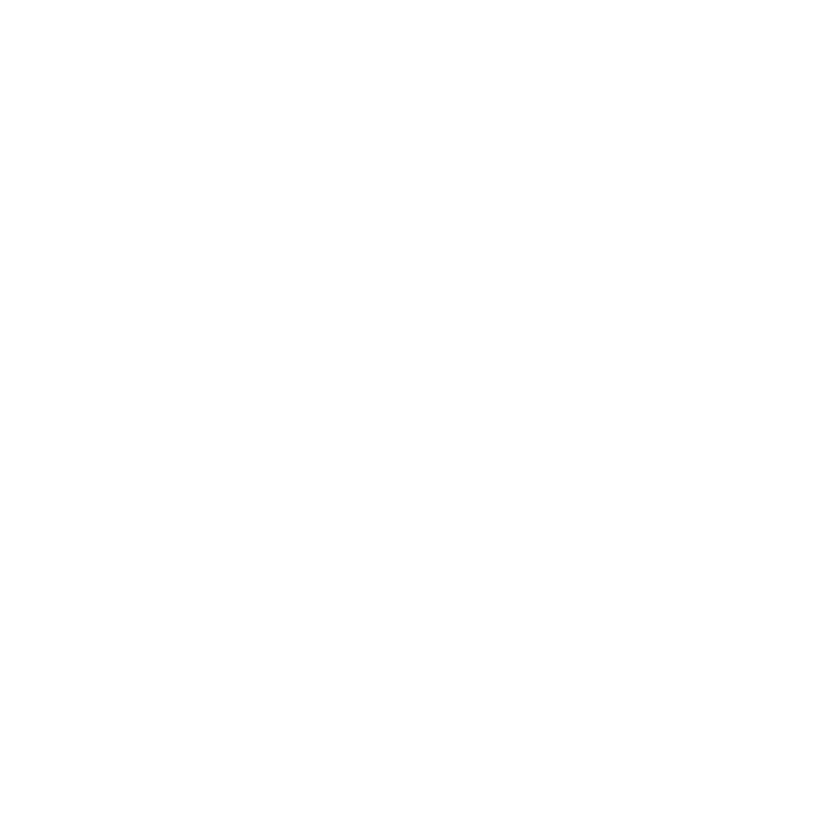

In [7]:
load(file='~/notebooks/dissertation/artifacts/rq1/maxJ.RData')
maxJ %>% ggplot(aes(x=ls.range)) + geom_histogram(aes(y=stat(count))) +
    ggtitle(glue::glue('Figure 5: Histogram of SD thresholds for Max J')) +
    xlim(c(-3,3)) +
    theme(legend.position="bottom", text=element_text(family="Times New Roman", size=12))


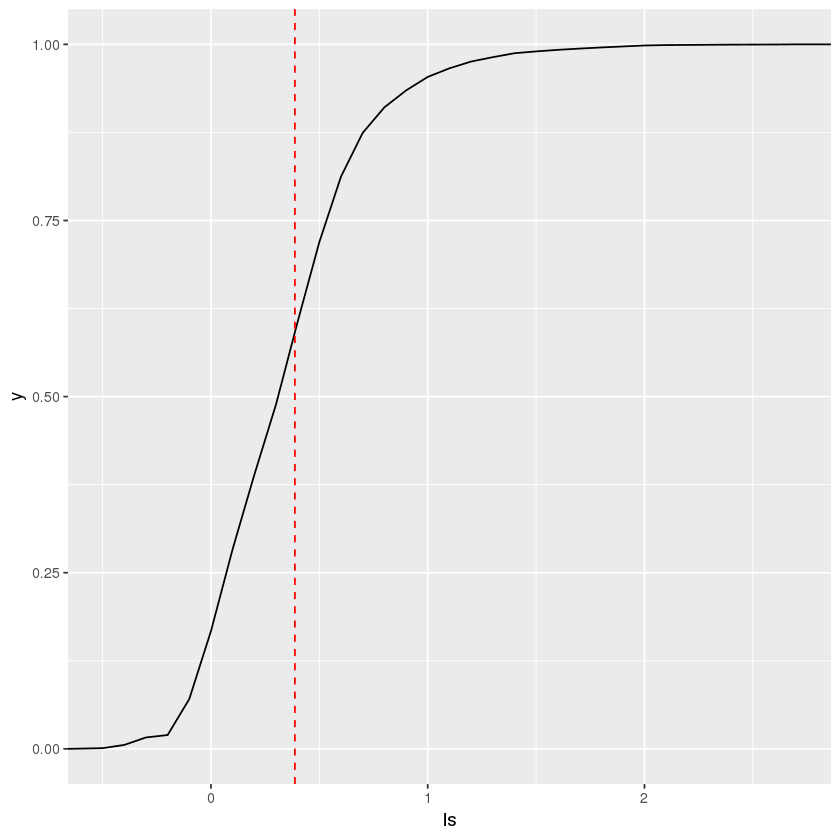

In [9]:
maxJ %>% ggplot(aes(x=ls)) + stat_ecdf(geom='line') + geom_vline(xintercept = mean(maxJ$ls), linetype="dashed", 
                color = "red", size=.5)

In [16]:
library(svglite)

ERROR: Error in library(svglite): there is no package called ‘svglite’


In [6]:
devtools::install_github("r-lib/svglite", dependencies=TRUE, force=TRUE)

from URL https://api.github.com/repos/r-lib/svglite/zipball/master
Installing svglite
'/usr/lib64/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/RtmpylqGDe/devtoolsaf9339451b9/r-lib-svglite-a148682'  \
  --library='/home/centos/R/x86_64-redhat-linux-gnu-library/3.5'  \
  --install-tests 

Installing xml2
'/usr/lib64/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL '/tmp/RtmpylqGDe/devtoolsaf911cc621e/xml2'  \
  --library='/home/centos/R/x86_64-redhat-linux-gnu-library/3.5'  \
  --install-tests 

Installation failed: Command failed (1)


In [7]:
devtools::install_github('hadley/xml2')

from URL https://api.github.com/repos/hadley/xml2/zipball/master
Installing xml2
'/usr/lib64/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/RtmpylqGDe/devtoolsaf95d8ede8a/r-lib-xml2-de9781d'  \
  --library='/home/centos/R/x86_64-redhat-linux-gnu-library/3.5'  \
  --install-tests 

Installation failed: Command failed (1)


In [21]:
error()

ERROR: Error in error(): could not find function "error"


Installing package into ‘/home/centos/R/x86_64-redhat-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
